# Team 5
## Discovery phase 1:
### Business Scenario

Objective:

To predict the price range of mobile phones from their specifications early in the design process, enabling manufacturers to tailor features for specific market segments. 



Problem:

A variety of factors including battery capacity, camera specifications, and processing power significantly impact the pricing and market positioning of mobile phones. Mispriced models can lead to market mismatches, resulting in unsold inventory and missed opportunities in specific consumer segments. By employing machine learning to accurately classify mobile phones into appropriate price ranges early in their design, manufacturers can better tailor their products to meet consumer demands and optimize market strategies, thus enhancing overall market success and consumer satisfaction.



## Data Preparation phase 2:


In [20]:
import pandas as pd
df = pd.read_csv('mobile_price_classification2.csv')
display(df)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,No,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,No,Yes,Cheap
1,1021,1,0.5,Yes,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,Yes,No,Avarage
2,563,1,0.5,Yes,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,Yes,No,Avarage
3,615,1,2.5,No,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,No,No,Avarage
4,1821,1,1.2,No,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,Yes,No,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,Yes,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,Yes,No,Very Cheap
1996,1965,1,2.6,Yes,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,Yes,Yes,Avarage
1997,1911,0,0.9,Yes,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,Yes,No,Expensive
1998,1512,0,0.9,No,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,Yes,Yes,Very Cheap


In [21]:
#1. Reading & displaying the data 
import pandas as pd
df = pd.read_csv('mobile_price_classification2.csv')
display(df.head())
#display(df)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,No,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,No,Yes,Cheap
1,1021,1,0.5,Yes,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,Yes,No,Avarage
2,563,1,0.5,Yes,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,Yes,No,Avarage
3,615,1,2.5,No,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,No,No,Avarage
4,1821,1,1.2,No,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,Yes,No,Cheap


In [22]:
#listing the fields and variables and identifying their type:
variables = df.columns.tolist()
#by reading the selected data, we identified the field types:
fieldTypes = ['numeric', 'nominal', 'numeric', 'nominal', 'numeric', 'nominal', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'nominal', 'nominal', 'nominal', 'categorical']

zippedData = zip(variables, fieldTypes)
print("Field Name      |   Field Type")
print("________________________________")

for fieldName, fieldType in zippedData:
    print(f"{fieldName.ljust(15)} | {fieldType}")   
#.ljust(12) is used to left-align the field names and pad them with spaces up to a width of 12 characters  

Field Name      |   Field Type
________________________________
battery_power   | numeric
blue            | nominal
clock_speed     | numeric
dual_sim        | nominal
fc              | numeric
four_g          | nominal
int_memory      | numeric
m_dep           | numeric
mobile_wt       | numeric
n_cores         | numeric
pc              | numeric
px_height       | numeric
px_width        | numeric
ram             | numeric
sc_h            | numeric
sc_w            | numeric
talk_time       | numeric
three_g         | nominal
touch_screen    | nominal
wifi            | nominal
price_range     | categorical


In [23]:
# now we identify the data types, we can also find null enteries by looking at the data type column
print("before cleaning the data:")
display(df.info()) 
# it is clear that there is 1 null column that we need to deal with.
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
print("after cleaning the data:")
display(df.info()) 
# now we have no null values after taking the mode of all cataegorical columns

before cleaning the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-nu

None

after cleaning the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-nul

/tmp/ipykernel_1739/1062139940.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


None

## Model Planing phase 3:


In [24]:
#part 3 (i), Find the statistical summaries:
numarical = df.select_dtypes(include='number')
categorical = df.select_dtypes(exclude='number')
print("before cleaning the data:")
display(numarical.describe())
display(categorical.describe())
# throught the min column we can see that there are some negative values which need to be resolved.
# to do that we take the absolute value of all numaical columns
# Additionally, in the m_dep column, the max value is 5, which is not possible as the range of m_dep is between 0 to 1. so we resolve this by dividing any value grater than 1 in that column by 10
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for column in numerical_columns:
    df[column] = df[column].abs()
    if column == 'm_dep':
        df[column] = df[column].apply(lambda x: x/10 if x > 1 else x)
print("after cleaning the data:")
display(df.describe()) # now we have no negative values in the numerical columns

before cleaning the data:


,battery_power,blue,clock_speed,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1237.861500,0.4950,1.522250,4.309500,0.521500,32.046500,0.504000,140.156000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500
std,441.266536,0.5001,0.816004,4.341444,0.499662,18.145715,0.305452,35.766273,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273
min,-657.000000,0.0000,0.500000,0.000000,0.000000,2.000000,0.100000,-93.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.0000,0.700000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000
50%,1226.000000,0.0000,1.500000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000
75%,1615.250000,1.0000,2.200000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000
max,1998.000000,1.0000,3.000000,19.000000,1.000000,64.000000,5.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000


,dual_sim,touch_screen,wifi,price_range
count,2000,2000,2000,2000
unique,2,2,2,4
top,Yes,Yes,Yes,Cheap
freq,1019,1006,1014,500


after cleaning the data:


,battery_power,blue,clock_speed,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500
std,439.418206,0.5001,0.816004,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273
min,501.000000,0.0000,0.500000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.0000,0.700000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000
50%,1226.000000,0.0000,1.500000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000
75%,1615.250000,1.0000,2.200000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000
max,1998.000000,1.0000,3.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000


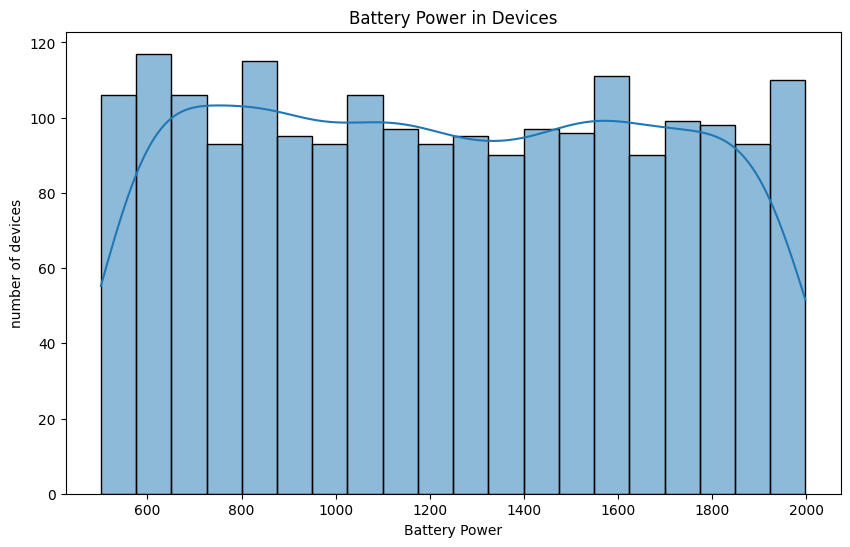

In [37]:
# ii. Make univariate graphs (graphs based on single variable)
# Example: Histogram for a single variable using distplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['battery_power'], bins=20, kde=True)
plt.title("Battery Power in Devices")
plt.xlabel("Battery Power")
plt.ylabel("number of devices")
plt.show()

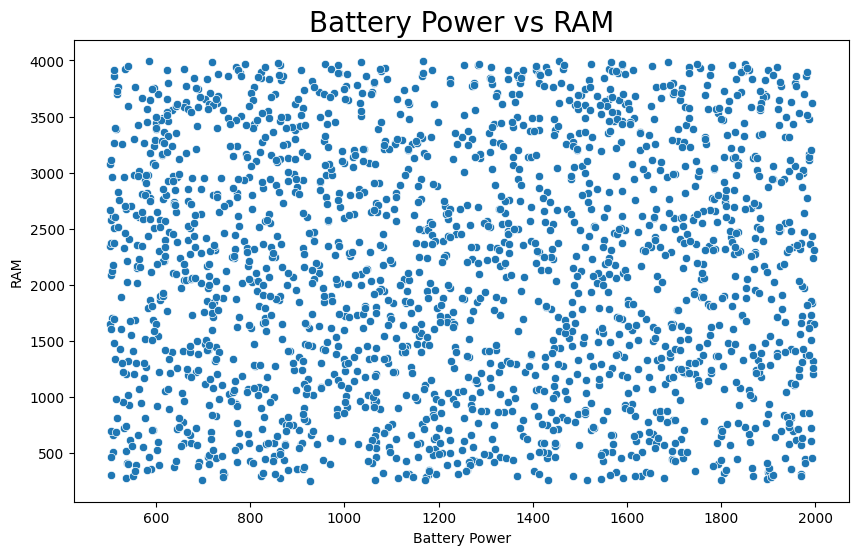

In [26]:
# iii. Prepare bivariate plots (plots based on two variables)
# Example: Scatter plot for two variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x = df['battery_power'], y = df['ram'])
plt.title("Battery Power vs RAM", fontsize = 20)
plt.xlabel("Battery Power")
plt.ylabel("RAM")
plt.show()

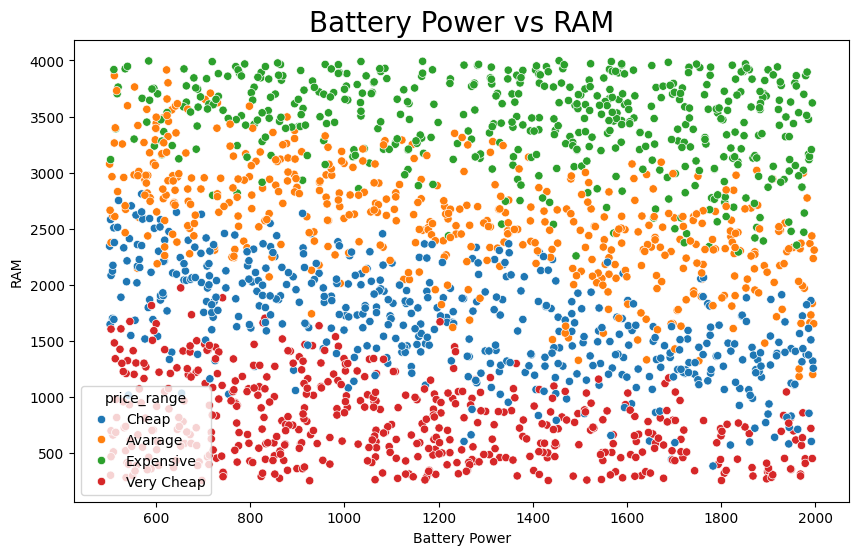

In [27]:
# iv. Prepare advanced plots (plots based on two or more variables)
# Example: Scatter plot for three variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x = df['battery_power'], y = df['ram'], hue = df['price_range'])
plt.title("Battery Power vs RAM", fontsize = 20)
plt.xlabel("Battery Power")
plt.ylabel("RAM")
plt.show()

In [28]:
# v. Assess the relationship between variables.
# However to do that, we need to convert the categorical columns to numerical columns first
# the output column gets a costume encoding based on the different price ranges
outputMap = {'Very Cheap': 0, 'Cheap': 1 , 'Avarage': 2, 'Expensive': 3}
df['price_range'] = df['price_range'].map(outputMap)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
display(df.head()) # data after encoding all the categorical columns

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


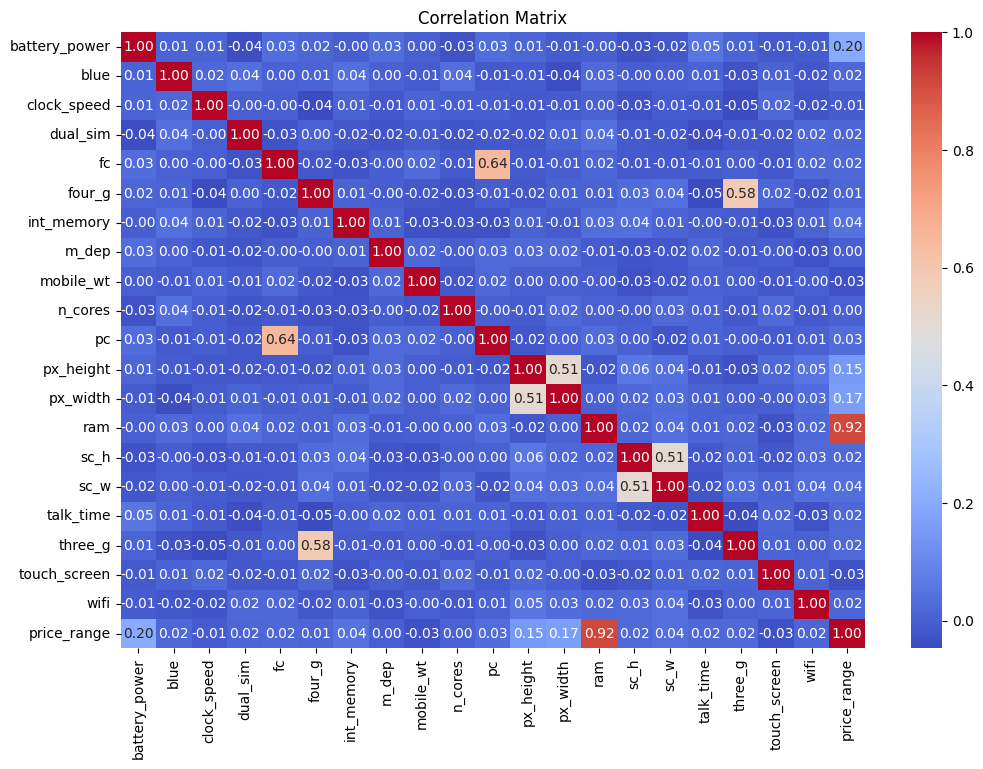

In [29]:
# now we can assess the relationship between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### b. Summarise your findings. 
- as we can see in the correlation matrix, the price range is highly correlated with the ram and battery power, which means that the price range is mostly dependent on the ram and battery power of the device.
- we can also make sure of the relation with the ram through the scatter plot we made earlier, which shows a clear seperation in the price range as the ram increases.


# Model Building Phase 4:

In [30]:
# a. Estimate the unknown model parameters (fitting) and evaluate the model (validation/cross-validation).
from sklearn.model_selection import train_test_split
X = df.drop('price_range', axis=1)
y = df['price_range'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [31]:
# making the decision tree model and fitting the data.
from sklearn import tree
dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
dtClf = dtClf.fit(X_train,y_train)
dt_y_pred = dtClf.predict(X_test)
# evaluating the model based on the accuracy and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision Tree: \n")
print("Accuracy:=",  accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred))

Decision Tree: 

Accuracy:= 0.83
Confusion Matrix:= 
 [[131  20   0   0]
 [ 18 118  10   0]
 [  0  22 106  20]
 [  0   0  12 143]]


In [32]:
# validating the model using cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross Validation Scores: ", scores)
print("Mean Score: ", scores.mean())

Cross Validation Scores:  [0.87857143 0.85       0.88214286 0.83928571 0.83928571]
Mean Score:  0.8578571428571429


In [33]:
# b. Compare different models based on the performance measures.
# we can compare the decision tree classifier with the naive bayes classifier using GaussianNB as the data is numerical (althoug some are nominal)
from sklearn.naive_bayes import GaussianNB
NBClf2 = GaussianNB()   
NBClf2.fit(X_train,y_train)
NB_y_pred = NBClf2.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("NB for Numerical  Data: \n")
print("Accuracy:=",  accuracy_score(y_test, NB_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred))
# From the results, it can be seen that the decision tree classifier performs better on the given data. There is some overlap between the two classes.

NB for Numerical  Data: 

Accuracy:= 0.7983333333333333
Confusion Matrix:= 
 [[137  14   0   0]
 [ 13 107  26   0]
 [  0  25 106  17]
 [  0   0  26 129]]


### c. Interpret the findings and provide the details of the final selected model.
- we can see based on the confusion matrix and the accuracy that the decision tree classifier is the best model for the given data.
- the decision tree classifier has an accuracy of 0.83, while the naive bayes classifier has an accuracy of 0.79
- this is also confirmed by looking closely at the confusion matrix.

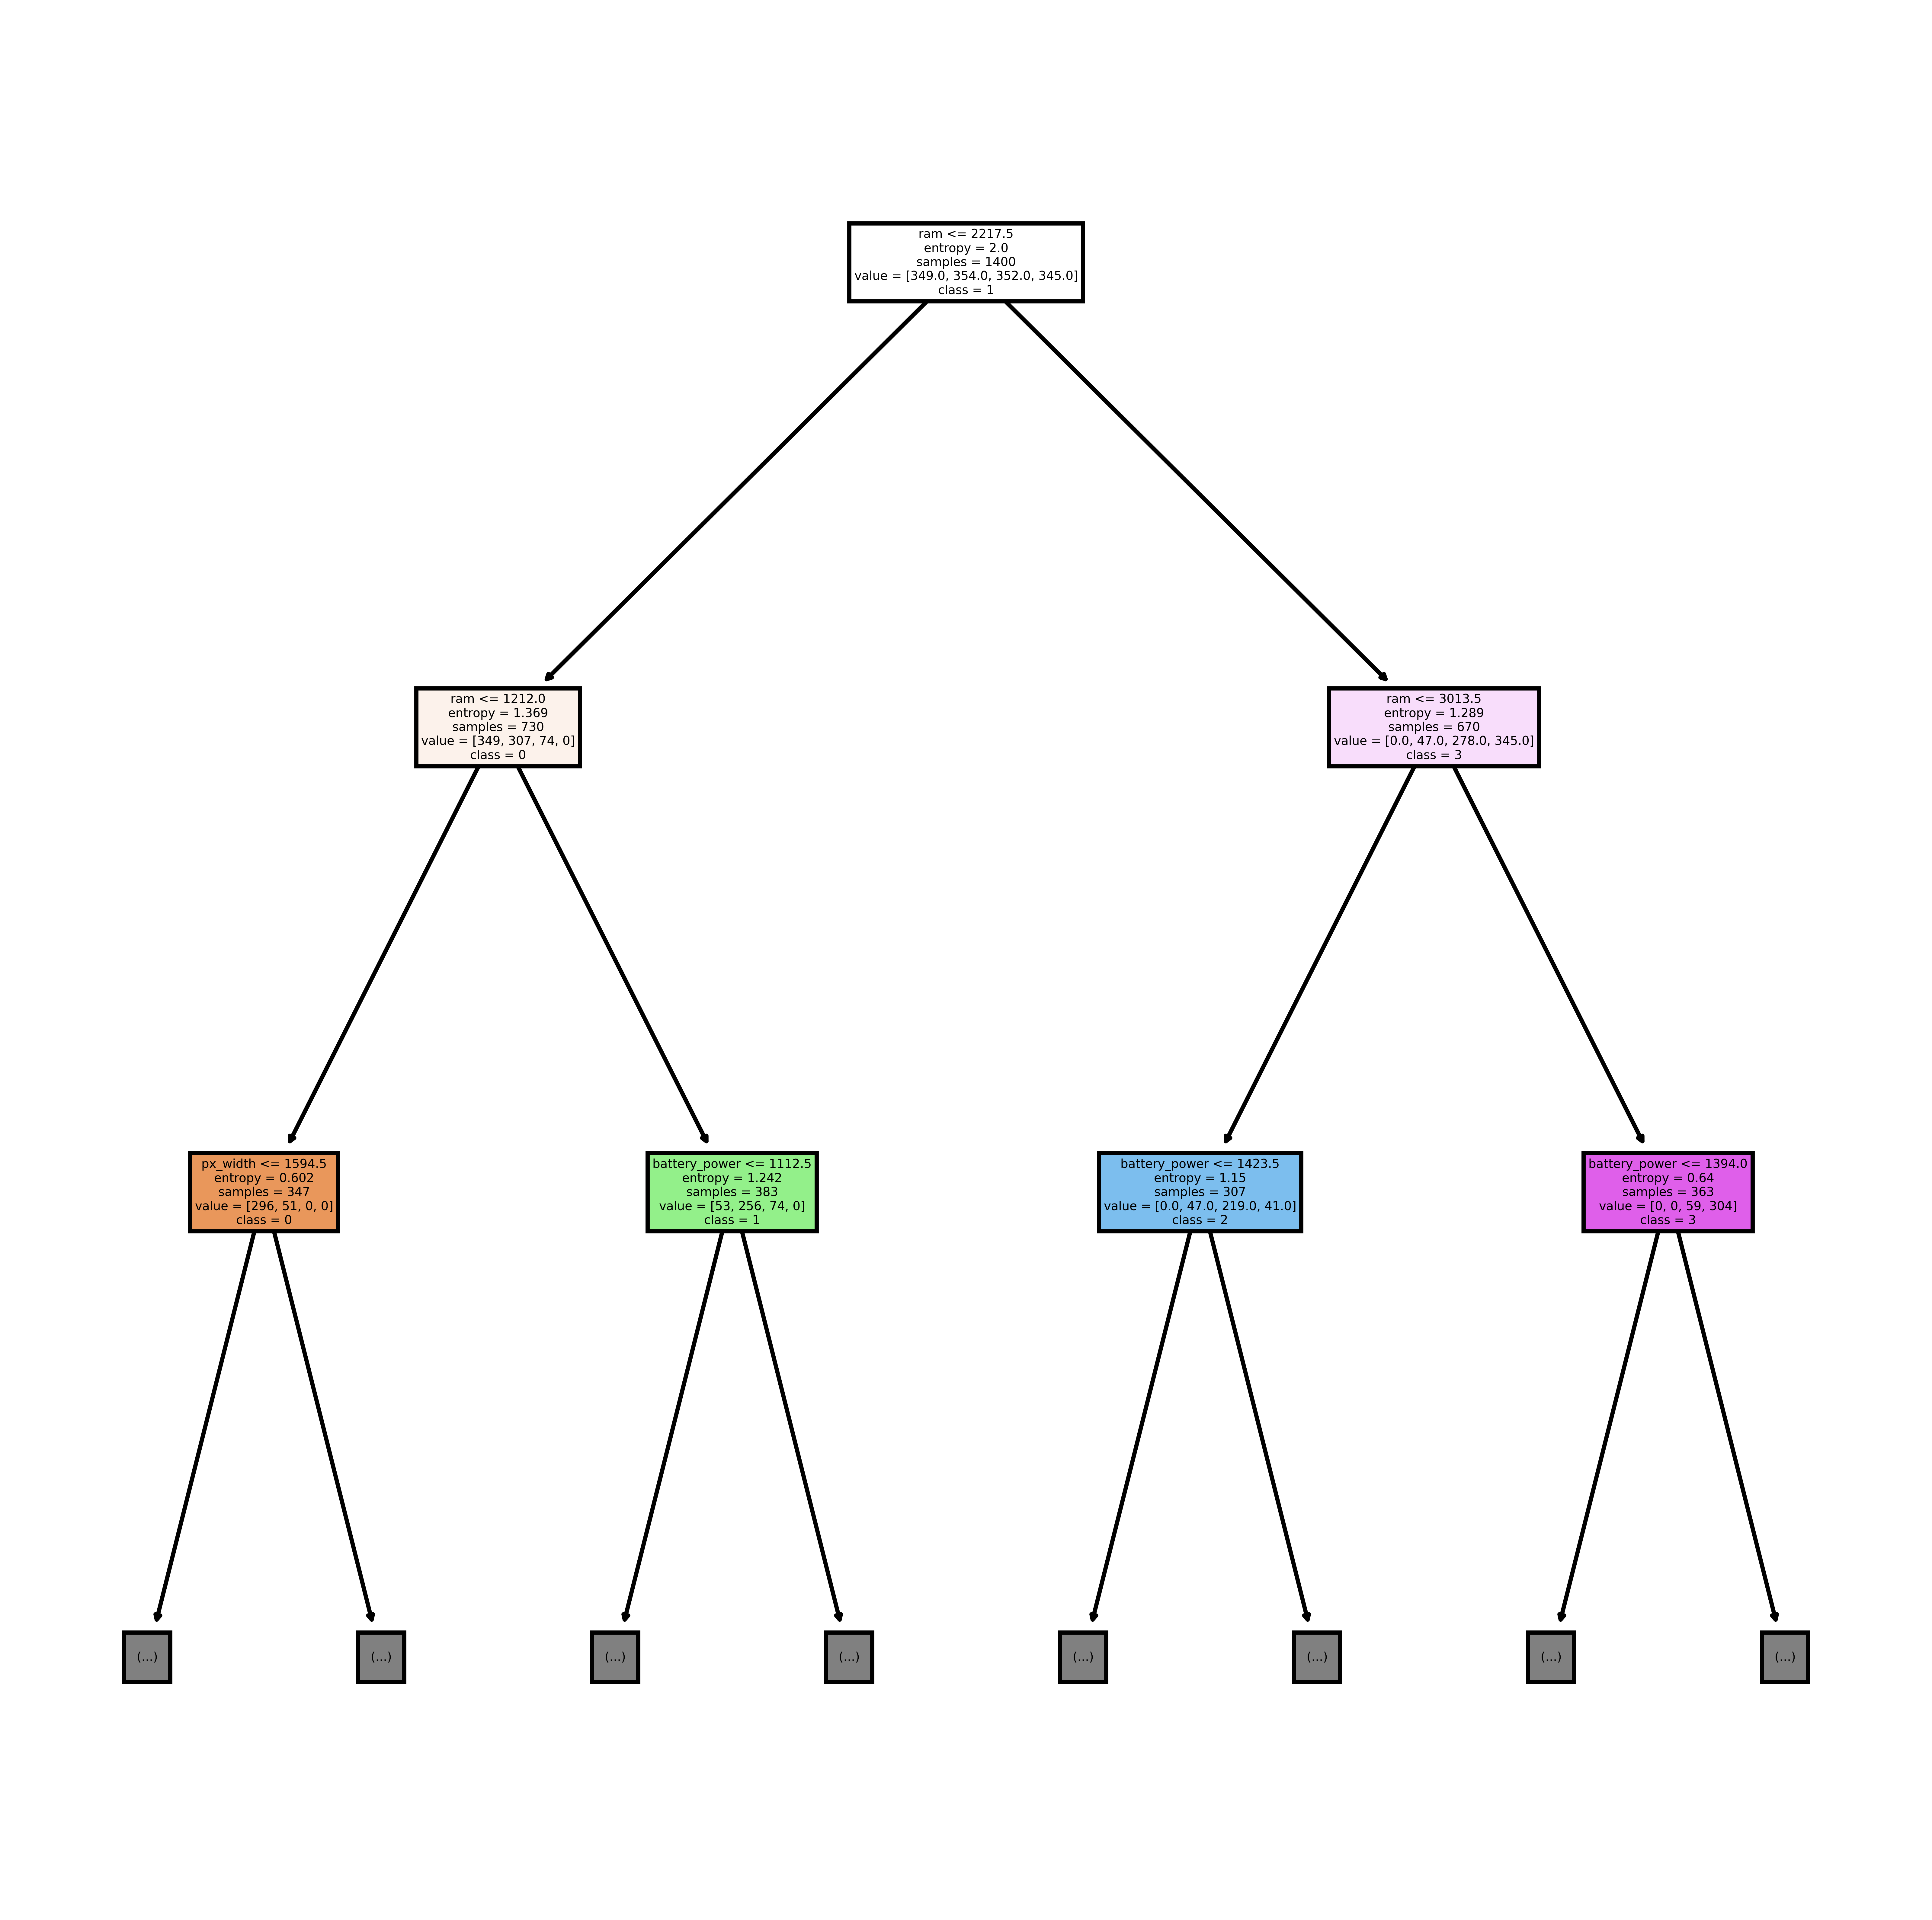

In [35]:
# decision tree visualization
import matplotlib.pyplot as plt
plt.figure(figsize =(8,8),dpi=1000)
tree.plot_tree(dtClf,filled=True, max_depth=2, feature_names=X.columns, class_names=['0', '1', '2', '3'])
plt.show()

# Communicate Results phase 5:


a. Provide the summary and conclusion of your analysis.
- we have concluded that the amount of ram a device has is the main factor for its price, followed by the battery power and the px width.
- we have also found out that all the other attributes made little to no difference in the price.
- it is a valid approach to consider making use of the other attributes to explore a side of the market that is not utalized currently in smart phones.

b. Give possible future recommendations.
- for future mobile devices, we could make use of the heavy relience on ram to set prices and focus on making phones with better ram and battery lifes as that seems to be what consumers care about the most in a smart phone at the moment.
- we could also try to base the price on other factors like the battery life or the camera quality as ram may be an unfamiliar term for the average user.

# Operationalize phase 6:

a. Provide the general guidelines to adopt your methodology.
- to make use of this model, the company could depend on it as a guidline to set prices for newer phones before releasing them, or as a means to see where their product stands in compareson to the market. 

b. List the problems and issues in the implementation of the selected methodology.
- one issue is that this model would not be able to give accurate results if there is a jump in the quality of smartphones and the need to adjust the prices arise. However, it is possible to use the same model when newer data is collected and the price stabalizes after such change. 

In [36]:
# 16 cells total
# 1 - 3 (intro) raghad A
# 4 - 5 (cleaning) naflah
# 6 - 8 (graphs)raghad Al-Garni
# 9 - 11 (correlations) danya
# 12 - 16 (module building) Salma